In [1]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Imported pandas to read the data

In [2]:
df = pd.read_csv(r"C:\Users\ranac\Downloads\heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [128]:
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Let's find the actual relation between the features**

C:\Users\ranac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

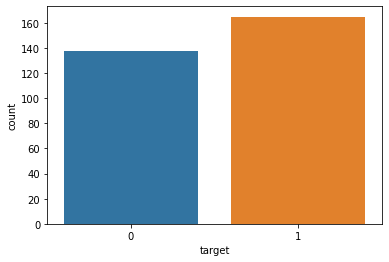

In [32]:
sns.countplot(df.target)         #the number of 0 and 1 relative equal so its a balanced data set

In [33]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**Relation between features**

heart disease relation regardin sex 

<AxesSubplot:xlabel='sex', ylabel='target'>

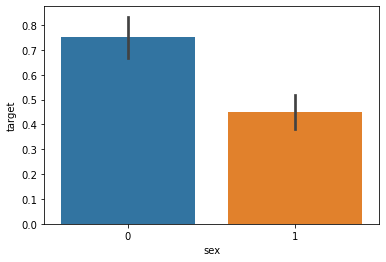

In [43]:
sns.barplot(x = 'sex' , y = 'target' ,  data = df)  # gender doesn't seem to be important here , 0 or  females get comparetively lot more heart disease.

<AxesSubplot:xlabel='cp', ylabel='target'>

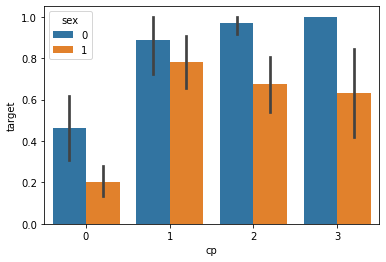

In [47]:
#cp = chest pain
sns.barplot(x = 'cp' , y = 'target' , hue = 'sex'  ,data = df)
#0: Typical angina: chest pain related decrease blood supply to the heart
#1: Atypical angina: chest pain not related to heart
#2: Non-anginal pain: typically esophageal spasms (non heart related)
#3: Asymptomatic: chest pain not showing signs of disease         

**it seems like 'Typical angina' chest pain is less in the patients. I'm gonna keep cp feature .**



**Relation between thalach , age with respect to target**
thalach - maximum heart rate achieved

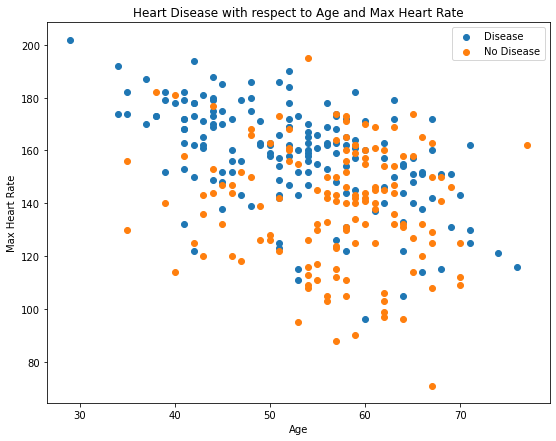

In [89]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1])

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0])

# Add some helpful info
plt.title("Heart Disease with respect to Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

**So its obvious from above figure that older people are relatively more at risk of catching a heart disease.
Further hearbeat rate is directly related to the probablity of having a heart disease.**

**chol** = serum cholestoral in mg/dl

-serum = LDL + HDL + .2 * triglycerides.
**above 200 is cause for concern**

<AxesSubplot:xlabel='chol', ylabel='age'>

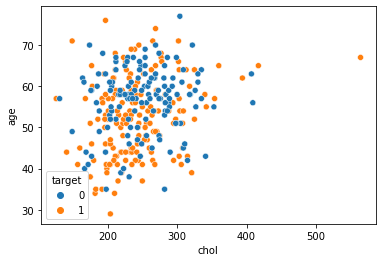

In [95]:
sns.scatterplot(x = 'chol' , y = 'age' , hue = 'target'  ,  data= df )

Creating correlation matrix and maps

In [98]:
corr = df.corr()

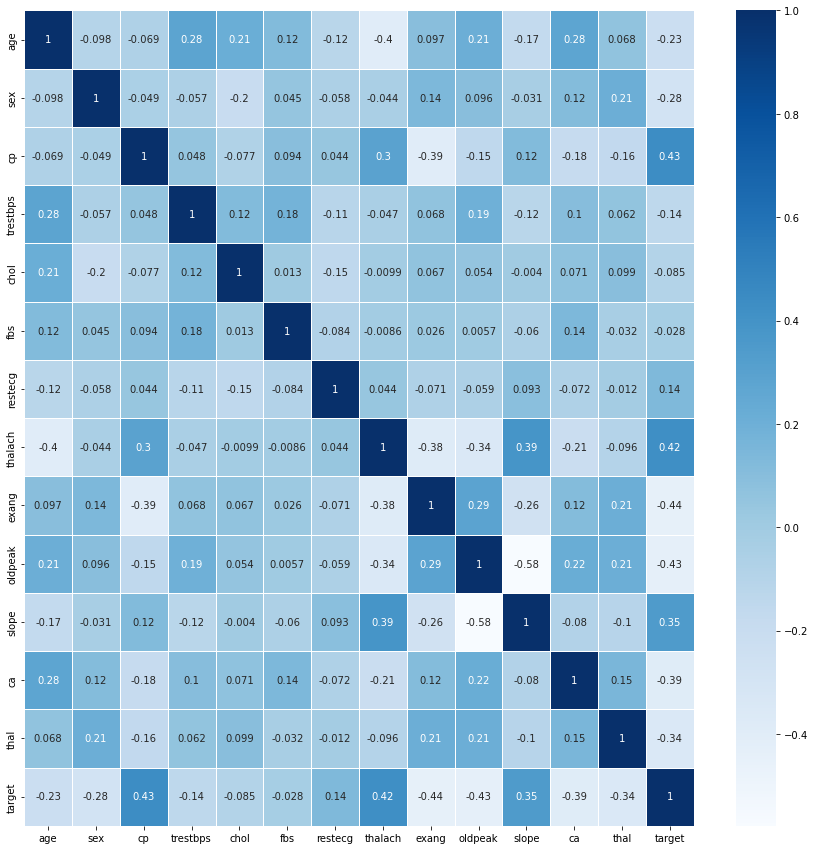

In [103]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=0.5,
                cmap="Blues")

In [104]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Standardizing the data values i.e.

In [107]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = sc.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [111]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
65,-2.135891,0,0,0.364165,-1.222608,0,1,1.414819,0,0.310912,2,0,2,1
152,1.062485,1,3,2.191778,-0.372287,0,0,0.234095,0,-0.379244,1,0,3,1
12,-0.591847,1,1,-0.092738,0.381407,0,1,0.933783,0,-0.379244,2,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
222,1.172774,1,3,0.364165,0.690615,1,0,1.064975,0,0.310912,1,1,2,0


# 1. Using Logisitc Regression Model

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [115]:
x_train, x_test,y_train, y_test = train_test_split(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] , df.target ,  test_size= 0.2)

In [116]:
ml = LogisticRegression()
ml.fit(x_train , y_train)

LogisticRegression()

In [117]:
x_train_pred = ml.predict(x_train)
x_test_pred = ml.predict(x_test)

Checking accuracy score , confusion matrix

In [124]:
accuracy_score(y_train ,x_train_pred)  #for train model

0.71900826446281

In [125]:
confusion_matrix(y_train ,x_train_pred) # for train model

array([[ 68,  40],
       [ 28, 106]], dtype=int64)

In [126]:
accuracy_score(y_test ,x_test_pred) # for test model

0.7540983606557377

In [127]:
confusion_matrix(y_test ,x_test_pred) # for test model

array([[18, 12],
       [ 3, 28]], dtype=int64)

# 2. Using KNN model

In [131]:
from sklearn.neighbors import KNeighborsClassifier


In [161]:
ml2 = KNeighborsClassifier(n_neighbors=5)

In [162]:
ml2.fit(x_train ,y_train)

KNeighborsClassifier()

In [163]:
x_train_pred2 =ml2.predict(x_train)
x_test_pred2 = ml2.predict(x_test)

In [164]:
print(accuracy_score(y_train ,x_train_pred2))
print(confusion_matrix(y_train ,x_train_pred2))  #77% accuracy with training model

0.7727272727272727
[[ 76  32]
 [ 23 111]]


In [165]:
print(accuracy_score(y_test ,x_test_pred2))
print(confusion_matrix(y_test ,x_test_pred2))   #77% accuracy with testing model

0.7049180327868853
[[16 14]
 [ 4 27]]


# Using Decision Tree Classifier

In [166]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [167]:
ml3 = DecisionTreeClassifier()
ml3.fit(x_train ,y_train)

DecisionTreeClassifier()

In [168]:
x_train_pred3 =ml3.predict(x_train)
x_test_pred3 = ml3.predict(x_test)

In [169]:
print(accuracy_score(y_train ,x_train_pred3))
print(confusion_matrix(y_train ,x_train_pred3)) #0verfitting case

1.0
[[108   0]
 [  0 134]]


In [170]:
print(accuracy_score(y_test ,x_test_pred3))
print(confusion_matrix(y_test ,x_test_pred3))  # accuray on testing data is too poor.

0.5737704918032787
[[10 20]
 [ 6 25]]
